In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
import quandl
quandl.ApiConfig.api_key = "KuL7iL8zUg7h8iZzXh9_"

#def gen_stock_info(ticker, start, end):
def gen_stock_info():
    #stock_df = quandl.get(''.join(['WIKI/', ticker]), start_date=start, end_date=end)
    stock_df=quandl.get("BCHARTS/BITSTAMPUSD")
    stock_df = stock_df[(stock_df['Open'] != 0) & (stock_df['Close'] != 0)]
    return stock_df  #only need some columns


def add_Moving_Ave(stock_df):
    ma_list = ['ma5','ma20', 'ma60', 'ma120']
    window_list = [5, 20, 60, 120]
    for ma, window_ in zip(ma_list, window_list):
        stock_df[ma] = stock_df['Close'].rolling(window=window_).mean()
    return stock_df
    
    
def add_STD(stock_df):
    std_list = ['std_20']
    window_list = [20]
    for std, window_ in zip(std_list, window_list):
        stock_df[std] = stock_df['Close'].rolling(window=window_).std()
    return stock_df

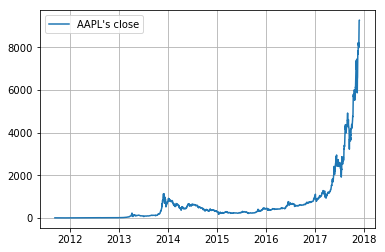

In [14]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 6, 8)
#apple_df = web.DataReader("AAPL", 'google', start, end)
apple_df = gen_stock_info()
plt.plot(apple_df.index, apple_df.Close, label="AAPL's close")
plt.grid()
plt.legend(loc = "best")


In [5]:
apple_df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-02,153.58,155.45,152.89,155.45,27770715
2017-06-05,154.34,154.45,153.46,153.93,25331662
2017-06-06,153.90,155.81,153.78,154.45,26624926
2017-06-07,155.02,155.98,154.48,155.37,21069647
2017-06-08,155.25,155.54,154.40,154.99,21250798


In [15]:
ma5 = apple_df['Close'].rolling(window=5).mean()
apple_df['ma5']=ma5
#apple_df.insert(len(apple_df.columns), "MA5", ma5) #insert is also possible.
apple_df.head(10)

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,ma5
Date,,,,,,,,
2011-09-13,5.80,6.00,5.65,5.97,58.371382,346.097389,5.929231,NaN
2011-09-14,5.58,5.72,5.52,5.53,61.145984,341.854813,5.590798,NaN
2011-09-15,5.12,5.24,5.00,5.13,80.140795,408.259002,5.094272,NaN
2011-09-16,4.82,4.87,4.80,4.85,39.914007,193.763147,4.854515,NaN
2011-09-17,4.87,4.87,4.87,4.87,0.300000,1.461000,4.870000,5.270
2011-09-18,4.87,4.92,4.81,4.92,119.812800,579.843103,4.839576,5.060
2011-09-19,4.90,4.90,4.90,4.90,20.000000,98.000000,4.900000,4.934
2011-09-20,4.92,5.66,4.92,5.66,89.280711,481.049263,5.388054,5.040
2011-09-21,5.70,5.79,5.66,5.66,17.629322,100.594234,5.706075,5.202


In [7]:
apple_df[apple_df['Volume']<0]

,Open,High,Low,Close,Volume,ma5
Date,,,,,,


In [16]:
apple_df['ma20'] = apple_df['Close'].rolling(window=20).mean()
apple_df['ma60'] = apple_df['Close'].rolling(window=60).mean()
apple_df['ma120'] = apple_df['Close'].rolling(window=120).mean()
apple_df['std_20'] = apple_df['Close'].rolling(window=20).std()
apple_df.tail(10)


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,ma5,ma20,ma60,ma120,std_20
Date,,,,,,,,,,,,
2017-11-18,7675.00,7858.00,7431.54,7771.03,7326.810140,5.626497e+07,7679.326492,7439.196,6973.2635,5597.371833,4684.994833,552.316985
2017-11-19,7775.55,8087.35,7675.00,8016.58,8307.777509,6.533206e+07,7863.964169,7720.712,7068.0930,5666.407167,4728.193750,560.854984
2017-11-20,8016.58,8269.99,7900.00,8226.17,8179.457727,6.636601e+07,8113.741769,7907.146,7157.6910,5743.225833,4773.836667,596.277338
2017-11-21,8226.14,8354.46,7770.00,8095.23,13686.511239,1.108113e+08,8096.384941,7956.800,7225.3730,5817.943333,4818.297083,622.795433
2017-11-22,8095.19,8310.89,8045.76,8214.69,8078.580801,6.621571e+07,8196.453479,8064.740,7284.6075,5891.868667,4865.379333,658.547520
2017-11-23,8214.69,8279.76,7980.00,7989.00,7811.793400,6.364474e+07,8147.263648,8108.334,7326.7165,5963.948333,4910.912750,675.968386
2017-11-24,7988.96,8340.00,7876.00,8199.19,9289.989257,7.575187e+07,8154.139542,8144.856,7367.2345,6035.301500,4957.019917,703.609105
2017-11-25,8199.83,8737.00,8114.78,8717.99,11611.666379,9.762892e+07,8407.830677,8243.220,7434.4980,6115.800833,5006.528083,765.721965
2017-11-26,8718.00,9366.60,8538.20,9271.06,12021.215487,1.085258e+08,9027.857089,8478.386,7549.6670,6200.330333,5061.448917,859.315376


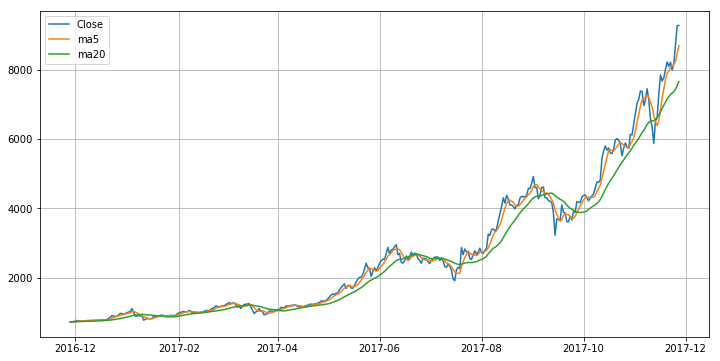

In [17]:
plt.figure(figsize=(12,6))
plt.plot(apple_df.index[-365:],apple_df.Close[-365:],label='Close')
plt.plot(apple_df.index[-365:],apple_df.ma5[-365:],label='ma5')
plt.plot(apple_df.index[-365:],apple_df.ma20[-365:],label='ma20')
# plt.plot(apple_df.index[-365:],apple_df.ma60[-365:],label='ma60')
# plt.plot(apple_df.index[-365:],apple_df.ma120[-365:],label='ma120')
plt.legend(loc='best')

plt.grid()
plt.show()

In [11]:
apple_df_test = apple_df.loc[:,['Close']]
apple_df_test.columns = ['AAPL']
apple_df_test.head()
#apple_df_test = apple_df_test.tz_localize('UTC')


,AAPL
Date,
2010-01-04,30.57
2010-01-05,30.63
2010-01-06,30.14
2010-01-07,30.08
2010-01-08,30.28


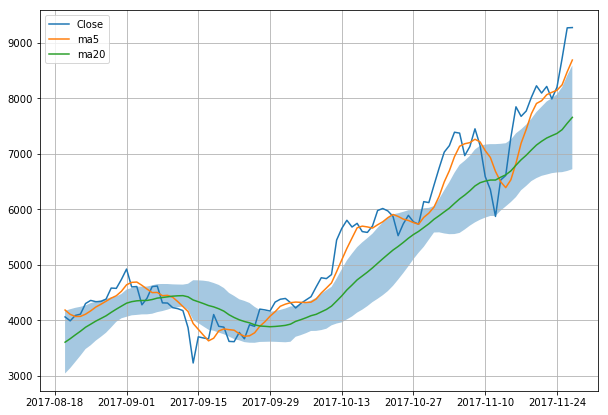

In [19]:
plt.figure(figsize=(10,7))
plt.plot(apple_df.index[-100:],apple_df.Close[-100:],label='Close')
plt.plot(apple_df.index[-100:],apple_df.ma5[-100:],label='ma5')
plt.plot(apple_df.index[-100:],apple_df.ma20[-100:],label='ma20')
plt.fill_between(apple_df.index[-100:],apple_df.ma20[-100:]-apple_df.std_20[-100:],apple_df.ma20[-100:]+apple_df.std_20[-100:], alpha=0.4)
plt.legend(loc='best')

plt.grid()
plt.show()

In [13]:
apple_df.iloc[119:].head(10)

,Open,High,Low,Close,Volume,ma5,ma20,ma60,ma120,std_20
Date,,,,,,,,,,
2010-06-25,38.58,38.61,37.97,38.10,137485271,38.592,37.3305,36.361167,33.213000,1.308070
2010-06-28,38.13,38.54,37.79,38.33,146358254,38.538,37.4120,36.440500,33.277667,1.317464
2010-06-29,37.73,37.77,36.33,36.60,283336130,38.034,37.3790,36.482667,33.327417,1.329681
2010-06-30,36.67,36.85,35.72,35.93,184867060,37.478,37.2900,36.511167,33.375667,1.365450
2010-07-01,36.33,36.40,34.75,35.50,255738140,36.892,37.1855,36.530000,33.420833,1.420161
2010-07-02,35.78,35.85,34.74,35.28,173624381,36.328,37.1210,36.546667,33.462500,1.477715
2010-07-06,35.86,36.11,35.17,35.52,153808676,35.766,37.1045,36.563000,33.508333,1.494402
2010-07-07,35.78,36.97,35.68,36.95,163639812,35.836,37.1710,36.602000,33.569000,1.453909
2010-07-08,37.50,37.56,36.41,36.87,184537661,36.024,37.2775,36.639333,33.625500,1.340015


In [20]:
apple_df['positions']='None'
apple_df.loc[apple_df[apple_df['Close'] > apple_df['ma20']+ apple_df['std_20']].index,['positions']]='Long'
apple_df.loc[apple_df[apple_df['Close'] < apple_df['ma20']- apple_df['std_20']].index,['positions']]='Short'

In [21]:
apple_df['position_change']='None'
for i in range(1,len(apple_df.index)):
    if ((apple_df.iloc[i-1]['positions']=='None') and (apple_df.iloc[i]['positions']=='Long')):
        apple_df.loc[apple_df.index[i],['position_change']]='None to Long'
    elif ((apple_df.iloc[i-1]['positions']=='None') and (apple_df.iloc[i]['positions']=='Short')):
        apple_df.loc[apple_df.index[i],['position_change']]='None to Short'
    elif ((apple_df.iloc[i-1]['positions']=='Long') and (apple_df.iloc[i]['positions']=='None')):
        apple_df.loc[apple_df.index[i],['position_change']]='Long to None'
    elif ((apple_df.iloc[i-1]['positions']=='Short') and (apple_df.iloc[i]['positions']=='None')):
        apple_df.loc[apple_df.index[i],['position_change']]='Short to None'

In [16]:
apple_df[-365:]

,Open,High,Low,Close,Volume,ma5,ma20,ma60,ma120,std_20,positions,position_change
Date,,,,,,,,,,,,
2015-12-28,107.59,107.69,106.18,106.82,26704210,107.604,112.7485,114.737667,115.616333,4.539137,Short,None
2015-12-29,106.96,109.43,106.86,108.74,30931243,107.886,112.2705,114.710333,115.521917,4.425707,None,Short to None
2015-12-30,108.58,108.70,107.18,107.32,25213777,107.904,111.7695,114.652667,115.388917,4.388611,Short,None to Short
2015-12-31,107.01,107.03,104.82,105.26,40912316,107.234,111.2185,114.551833,115.218917,4.483275,Short,None
2016-01-04,102.61,105.37,102.00,105.35,67281190,106.698,110.7260,114.461333,115.050083,4.563188,Short,None
2016-01-05,105.75,105.85,102.41,102.71,55790992,105.876,109.9100,114.348167,114.849167,4.458073,Short,None
2016-01-06,100.56,102.37,99.87,100.70,68457388,104.268,109.0310,114.157833,114.617417,4.454023,Short,None
2016-01-07,98.68,100.13,96.43,96.45,81094428,102.094,107.9420,113.905333,114.341000,4.739918,Short,None
2016-01-08,98.55,99.11,96.76,96.96,70798016,100.434,107.0090,113.658167,114.048417,4.979498,Short,None


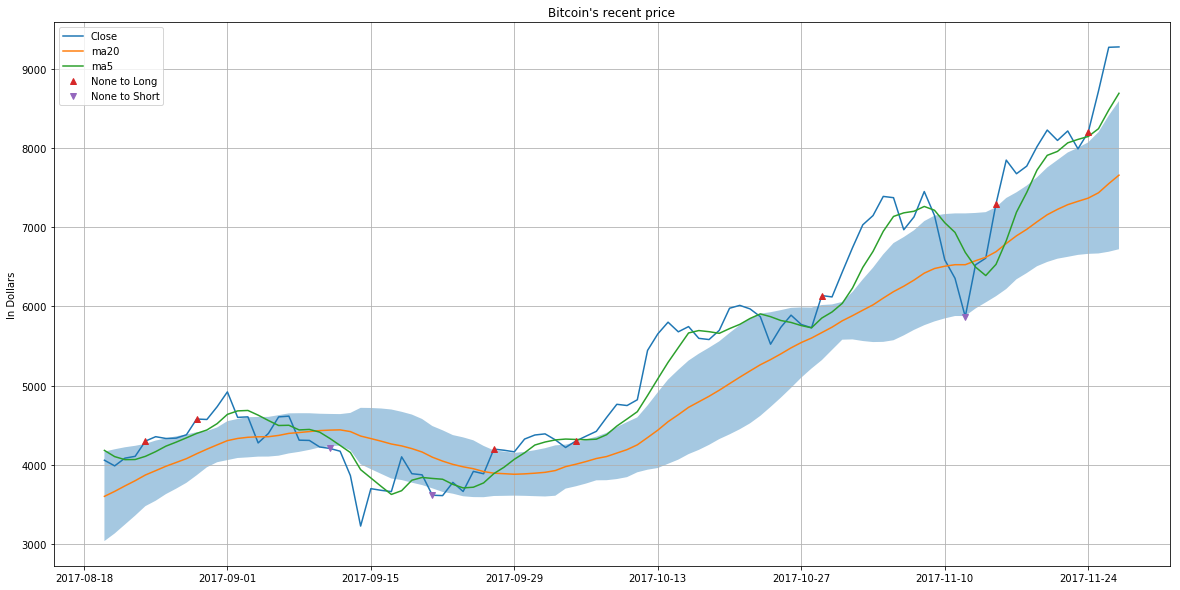

In [25]:
plt.figure(figsize=(20,10))
plt.plot(apple_df.index[-100:],apple_df.Close[-100:],label='Close')
plt.plot(apple_df.index[-100:],apple_df.ma20[-100:],label='ma20')

plt.plot(apple_df.index[-100:],apple_df.ma5[-100:],label='ma5')
plt.plot(apple_df.iloc[-100:][apple_df.iloc[-100:]['position_change']=='None to Long'].index,apple_df.iloc[-100:][apple_df.iloc[-100:]['position_change']=='None to Long'].Close,'^',label='None to Long')
#plt.plot(apple_df.iloc[-100:][apple_df.iloc[-100:]['position_change']=='Long to None'].index,apple_df.iloc[-100:][apple_df.iloc[-100:]['position_change']=='Long to None'].Close,'.',label='Long to None')

plt.plot(apple_df.iloc[-100:][apple_df.iloc[-100:]['position_change']=='None to Short'].index,apple_df.iloc[-100:][apple_df.iloc[-100:]['position_change']=='None to Short'].Close,'v',label='None to Short')
#plt.plot(apple_df.iloc[-100:][apple_df.iloc[-100:]['position_change']=='Short to None'].index,apple_df.iloc[-100:][apple_df.iloc[-100:]['position_change']=='Short to None'].Close,'.',label='Short to None')

plt.fill_between(apple_df.index[-100:],apple_df.ma20[-100:]-apple_df.std_20[-100:],apple_df.ma20[-100:]+apple_df.std_20[-100:], alpha=0.4)
plt.legend(loc='best')
plt.title('Bitcoin\'s recent price')
plt.ylabel('In Dollars')
plt.grid()
plt.show()



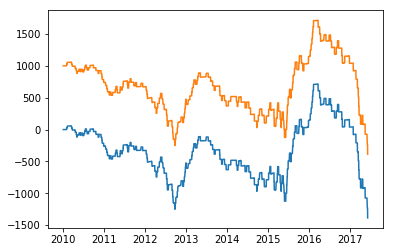

In [34]:
init_cash = 1000
apple_df['Cash']=0  #actually it means the cash flow at that time
apple_df.at[apple_df.index[0],'Cash']=init_cash
apple_df['Port_val']=0
apple_df['Total_asset']=0
apple_df.at[apple_df.index[0],'Total_asset'] = apple_df.iloc[0]['Cash']+apple_df.iloc[0]['Port_val']
apple_df['Net_profit']=0

for i in range(1,len(apple_df.index)):
        #if there is no change in our portfolio
    if ((apple_df.iloc[i-1]['positions']=='None') and (apple_df.iloc[i]['positions']=='None')):
        apple_df.loc[apple_df.index[i],'Cash']= apple_df.loc[apple_df.index[i-1],'Cash']
        apple_df.loc[apple_df.index[i],'Port_val']= 0
        apple_df.loc[apple_df.index[i],'Total_asset']= apple_df.loc[apple_df.index[i-1],'Total_asset']
        apple_df.loc[apple_df.index[i],'Net_profit']= 0

        #if we hold the same long position from the previous, only Port_val may change
    elif ((apple_df.iloc[i-1]['positions']=='Long') and (apple_df.iloc[i]['positions']=='Long')):
        apple_df.loc[apple_df.index[i],'Cash']= apple_df.loc[apple_df.index[i-1],'Cash']
        apple_df.loc[apple_df.index[i],'Port_val']= apple_df.loc[apple_df.index[i],'Close']
        apple_df.loc[apple_df.index[i],'Total_asset']= apple_df.loc[apple_df.index[i],'Cash'] + apple_df.loc[apple_df.index[i],'Port_val']
        apple_df.loc[apple_df.index[i],'Net_profit']= apple_df.loc[apple_df.index[i],'Total_asset'] - apple_df.loc[apple_df.index[i-1],'Total_asset']
       
    
    elif ((apple_df.iloc[i-1]['positions']=='Short') and (apple_df.iloc[i]['positions']=='Short')):
        apple_df.loc[apple_df.index[i],'Cash']= apple_df.loc[apple_df.index[i-1],'Cash']
        apple_df.loc[apple_df.index[i],'Port_val']= -apple_df.loc[apple_df.index[i],'Close']
        apple_df.loc[apple_df.index[i],'Total_asset']= apple_df.loc[apple_df.index[i],'Cash'] + apple_df.loc[apple_df.index[i],'Port_val']
        apple_df.loc[apple_df.index[i],'Net_profit']= apple_df.loc[apple_df.index[i],'Total_asset'] - apple_df.loc[apple_df.index[i-1],'Total_asset']
        
    
    elif ((apple_df.iloc[i-1]['positions']=='None') and (apple_df.iloc[i]['positions']=='Long')):
        apple_df.loc[apple_df.index[i],'Cash']= apple_df.loc[apple_df.index[i-1],'Cash'] - apple_df.loc[apple_df.index[i],'Close']
        apple_df.loc[apple_df.index[i],'Port_val']= apple_df.loc[apple_df.index[i],'Close']
        apple_df.loc[apple_df.index[i],'Total_asset']= apple_df.loc[apple_df.index[i],'Cash'] + apple_df.loc[apple_df.index[i],'Port_val']
        apple_df.loc[apple_df.index[i],'Net_profit']= apple_df.loc[apple_df.index[i],'Total_asset'] - apple_df.loc[apple_df.index[i-1],'Total_asset']
        
    elif ((apple_df.iloc[i-1]['positions']=='None') and (apple_df.iloc[i]['positions']=='Short')):
        apple_df.loc[apple_df.index[i],'Cash']= apple_df.loc[apple_df.index[i-1],'Cash'] + apple_df.loc[apple_df.index[i],'Close']
        apple_df.loc[apple_df.index[i],'Port_val']= -apple_df.loc[apple_df.index[i],'Close']
        apple_df.loc[apple_df.index[i],'Total_asset']= apple_df.loc[apple_df.index[i],'Cash'] + apple_df.loc[apple_df.index[i],'Port_val']
        apple_df.loc[apple_df.index[i],'Net_profit']= apple_df.loc[apple_df.index[i],'Total_asset'] - apple_df.loc[apple_df.index[i-1],'Total_asset']
        
    elif ((apple_df.iloc[i-1]['positions']=='Long') and (apple_df.iloc[i]['positions']=='None')):
        apple_df.loc[apple_df.index[i],'Cash']= apple_df.loc[apple_df.index[i-1],'Cash'] + (apple_df.loc[apple_df.index[i],'Close'] -apple_df.loc[apple_df.index[i-1],'Close'])
        apple_df.loc[apple_df.index[i],'Port_val']= 0
        apple_df.loc[apple_df.index[i],'Total_asset']= apple_df.loc[apple_df.index[i],'Cash']
        apple_df.loc[apple_df.index[i],'Net_profit']= apple_df.loc[apple_df.index[i],'Total_asset'] - apple_df.loc[apple_df.index[i-1],'Total_asset']
        
    elif ((apple_df.iloc[i-1]['positions']=='Short') and (apple_df.iloc[i]['positions']=='None')):
        apple_df.loc[apple_df.index[i],'Cash']= apple_df.loc[apple_df.index[i-1],'Cash'] - (apple_df.loc[apple_df.index[i],'Close'] - apple_df.loc[apple_df.index[i-1],'Close'])
        apple_df.loc[apple_df.index[i],'Port_val']= 0
        apple_df.loc[apple_df.index[i],'Total_asset']= apple_df.loc[apple_df.index[i],'Cash']
        apple_df.loc[apple_df.index[i],'Net_profit']= apple_df.loc[apple_df.index[i],'Total_asset'] - apple_df.loc[apple_df.index[i-1],'Total_asset']
        
apple_df['Cum_profit']=apple_df['Net_profit'].cumsum()
plt.plot(apple_df['Cum_profit'])
plt.plot(apple_df['Total_asset'])


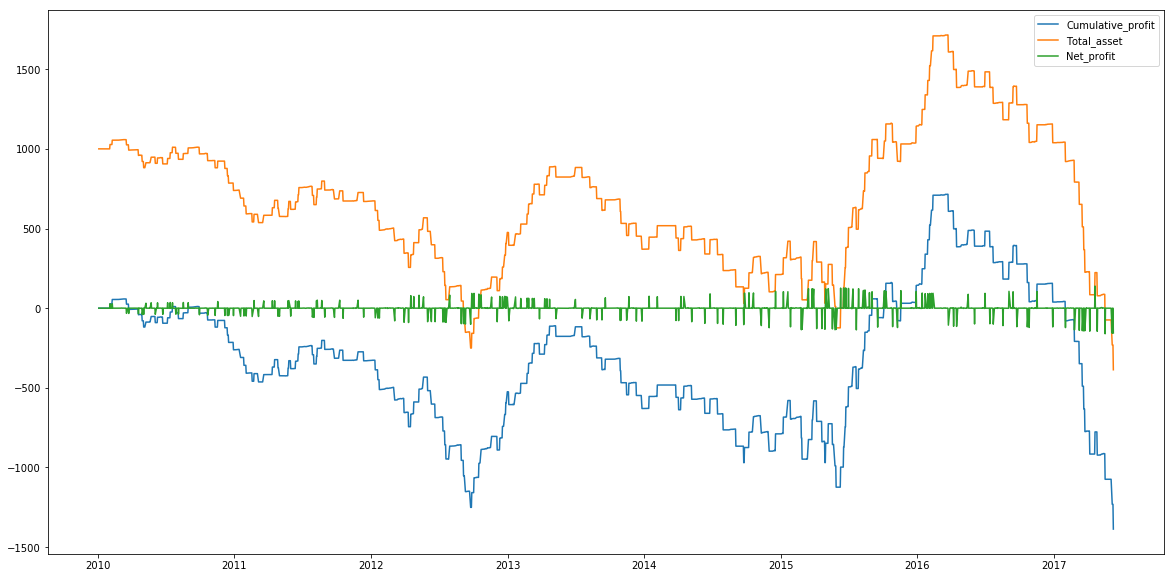

In [37]:
plt.figure(figsize=(20,10))
plt.plot(apple_df['Cum_profit'],label='Cumulative_profit')
plt.plot(apple_df['Total_asset'],label='Total_asset')
plt.plot(apple_df['Net_profit'],label='Net_profit')
plt.legend(loc='best')
plt.show()

In [107]:
-apple_df.loc[apple_df.index[1870-365],['Close']].values

array([-106.81999999999999], dtype=object)

In [104]:
len(apple_df.index)

1870

In [119]:
apple_df_test['cumsum']=apple_df_test.cumsum()
apple_df_test

,AAPL,cumsum
Date,,
2010-01-04,30.57,30.57
2010-01-05,30.63,61.20
2010-01-06,30.14,91.34
2010-01-07,30.08,121.42
2010-01-08,30.28,151.70
2010-01-11,30.02,181.72
2010-01-12,29.67,211.39
2010-01-13,30.09,241.48
2010-01-14,29.92,271.40


/Users/Sungwookhong/anaconda/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/Sungwookhong/anaconda/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
